***California Housing Dataset***

It contains data collected from the 1990 California census and is used to predict the median house value of California districts based on various features.

**Total entries**: 20,640

**Features**

**MedInc**: Median income in the block group.

**HouseAge**: Median house age in the block group.

**AveRooms**: Average number of rooms per household.

**AveBedrms**: Average number of bedrooms per household.

**Population**: Block group population.

**AveOccup**: Average number of household members.

**Latitude**: Block group latitude.

**Longitude**: Block group longitude.

**target**: Median house value for California districts (dependent variable).

**IMPORTING THE LIBRARIES**

In [3]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Fetch the California housing dataset
data = fetch_california_housing()

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable (house prices) to the DataFrame
df['target'] = data.target

# Display the first few rows of the dataset
print(df.head())  # Shows the first 5 rows of the dataset

# Get summary statistics of the dataset
print(df.describe())  # Provides statistics (mean, std, min, max, etc.)

# Display information about the dataset (columns, data types, etc.)
print(df.info())  # Provides information about column types, null values, etc.


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%       

In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd


2024-10-02 06:15:01.798405: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**LOADING DATASET**

In [6]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

**SPLITTING DATASET**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

**BASIC EDA ON DATASET**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [11]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

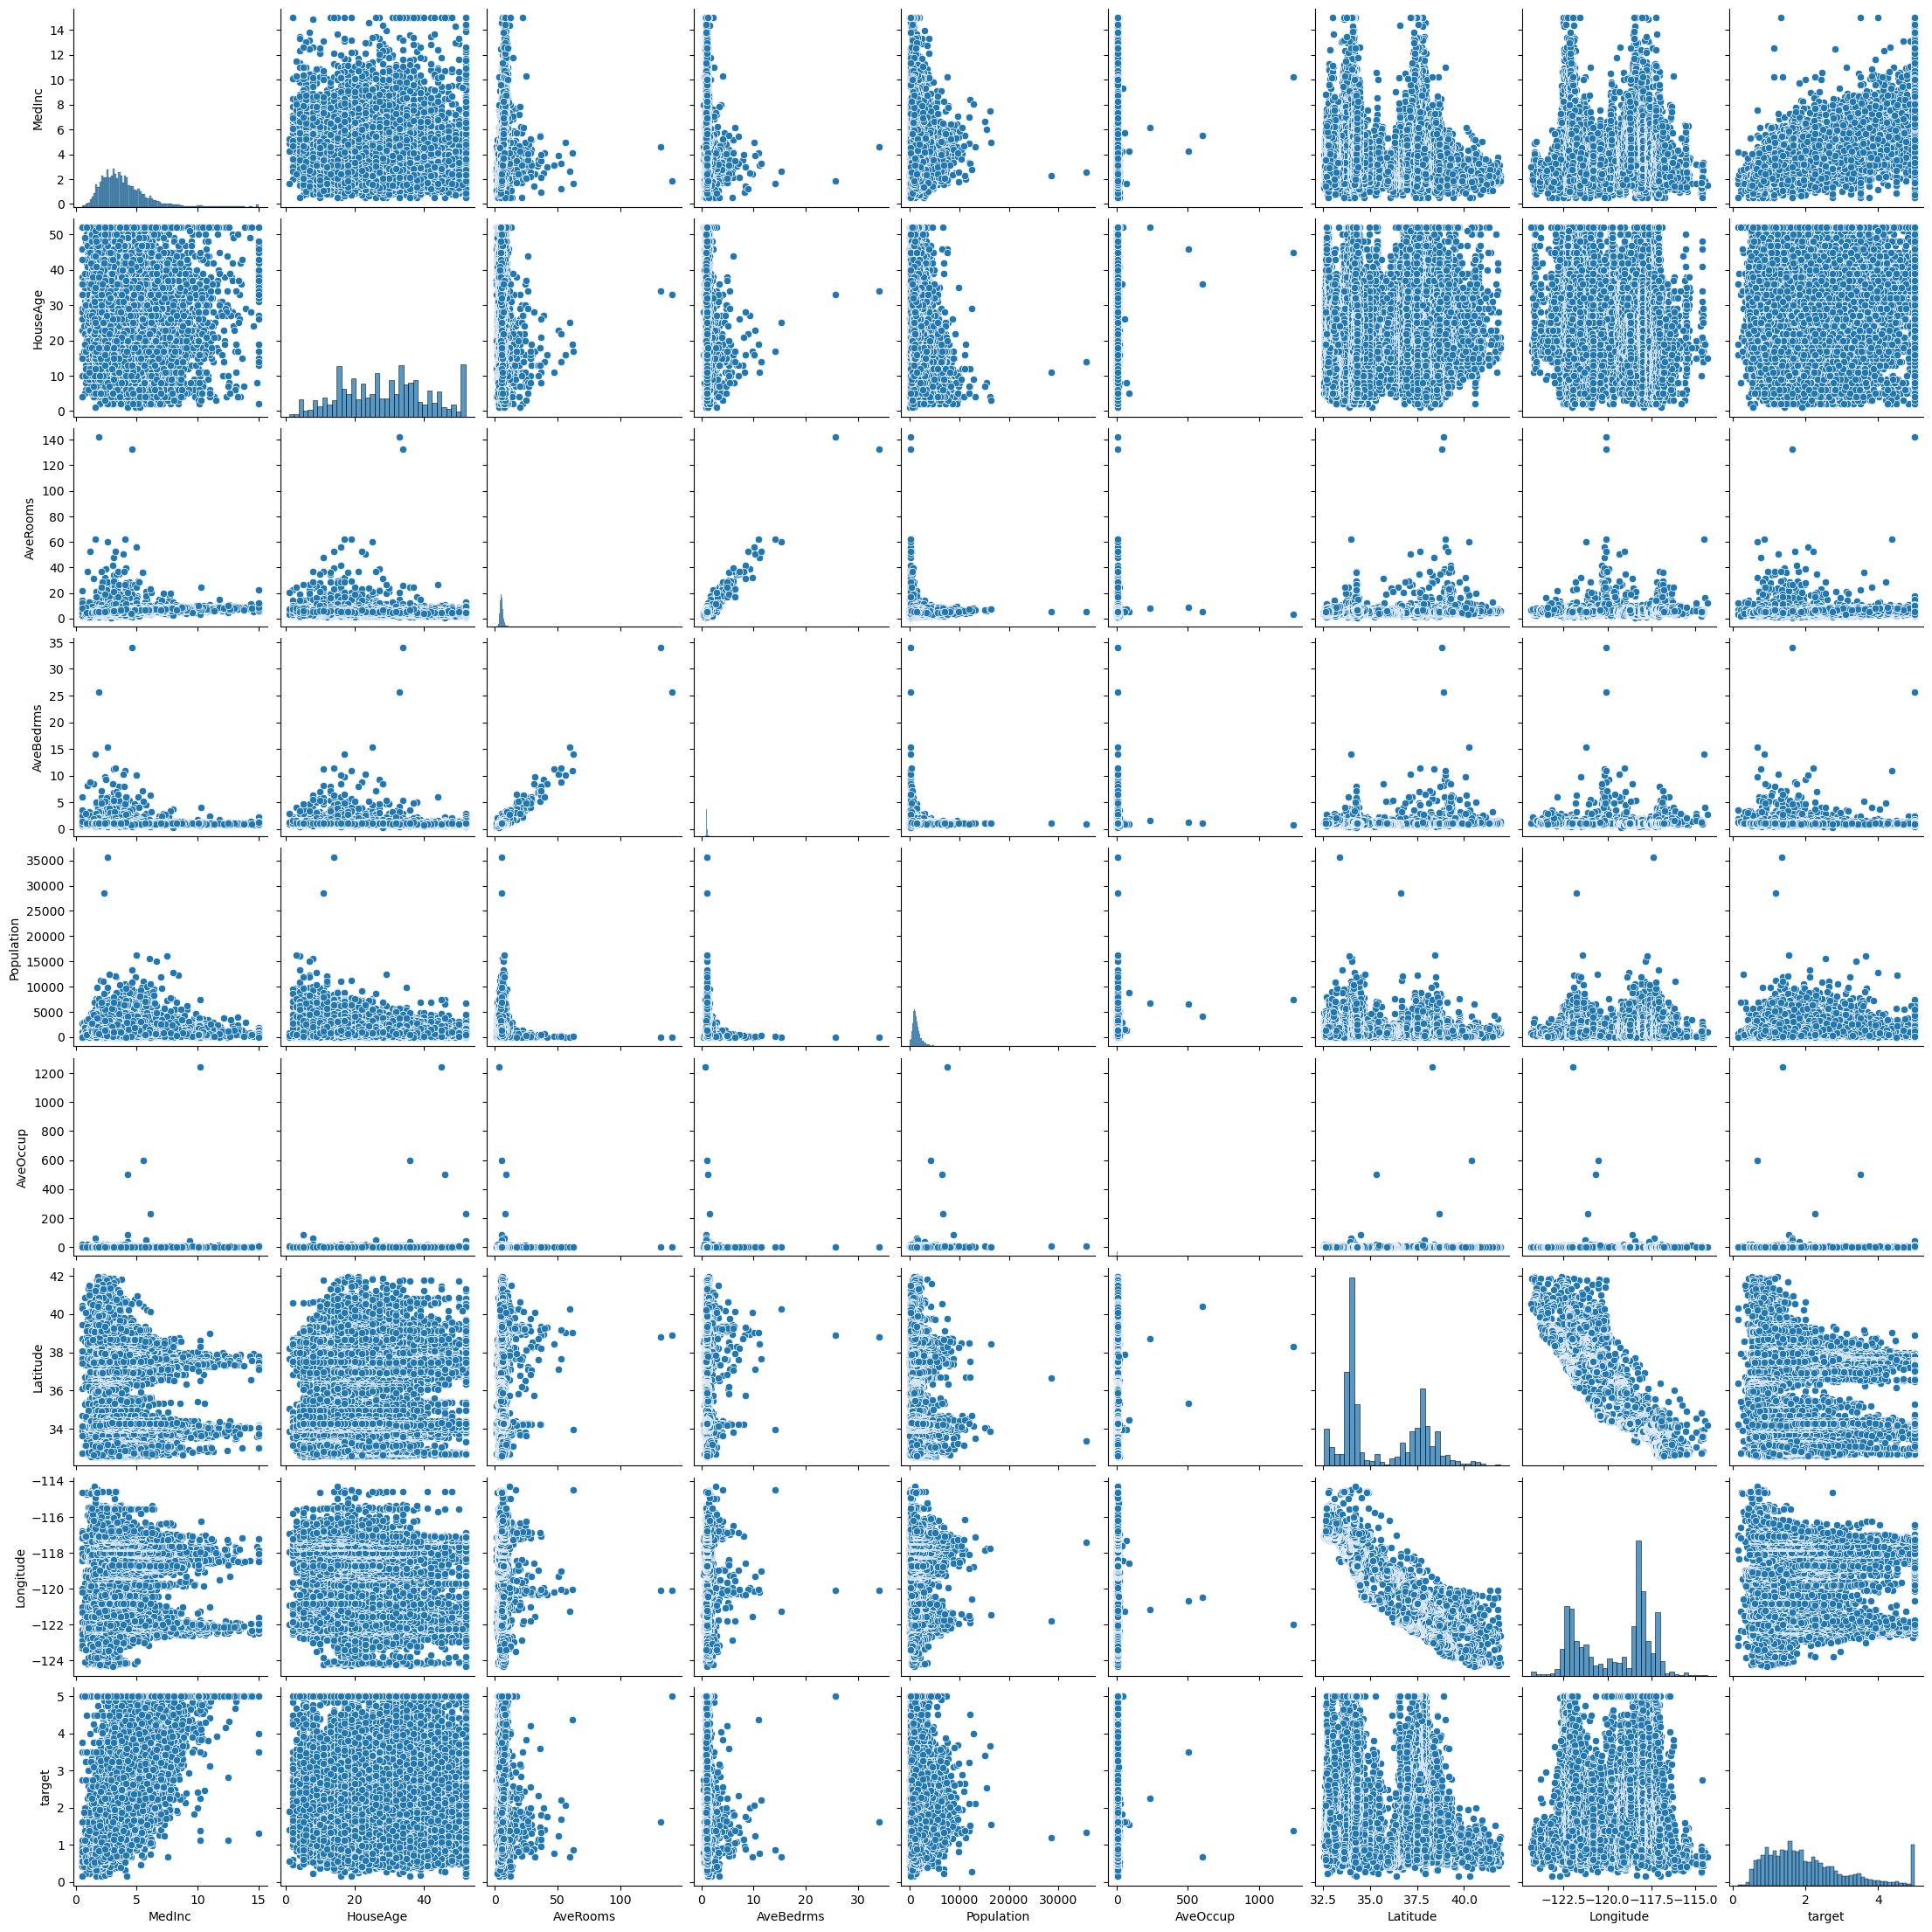

In [12]:
sns.pairplot(df)
plt.show()

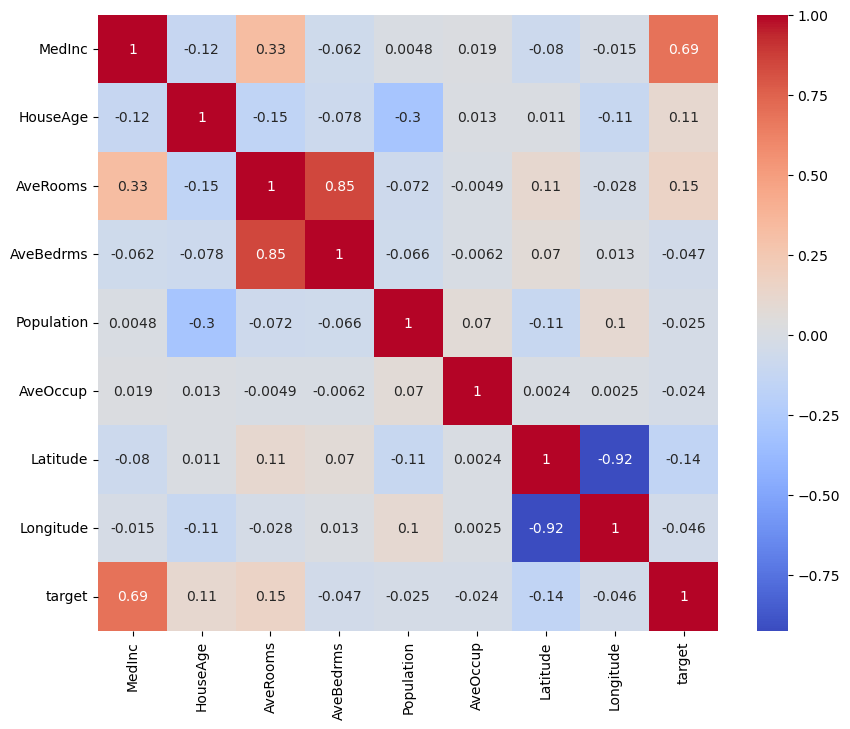

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


**STANDARDIZING DATASET**

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**RESHAPPING FOR FITTING INTO LSTM**

In [17]:
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

**BUILDING LSTM ARCHITECTURE**

In [19]:
from tensorflow.keras import layers, models

def build_lstm_model(input_shape):
    model = models.Sequential()
    model.add(layers.LSTM(50, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = build_lstm_model((X_train_scaled.shape[1], X_train_scaled.shape[2]))


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**EARLY STOPPING TECHNIQUE FOR STOPPING IF NO IMPROVEMENT SEEN**

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = lstm_model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])


Epoch 1/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.7551 - val_loss: 0.9278
Epoch 2/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8472 - val_loss: 0.6170
Epoch 3/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5476 - val_loss: 0.4589
Epoch 4/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4350 - val_loss: 0.4164
Epoch 5/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3898 - val_loss: 0.4006
Epoch 6/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3911 - val_loss: 0.4044
Epoch 7/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3707 - val_loss: 0.3828
Epoch 8/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3651 - val_loss: 0.3782
Epoch 9/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3648 - val_loss: 0.3728
Epoch 10/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3562 - val_loss: 0.3704
Epoch 11/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3590 - val_loss: 0.3689
Epoch 12/100
258/258 ━━━━━━━━━━━━━━━━━━━━

**VISUALISING RESULTS**

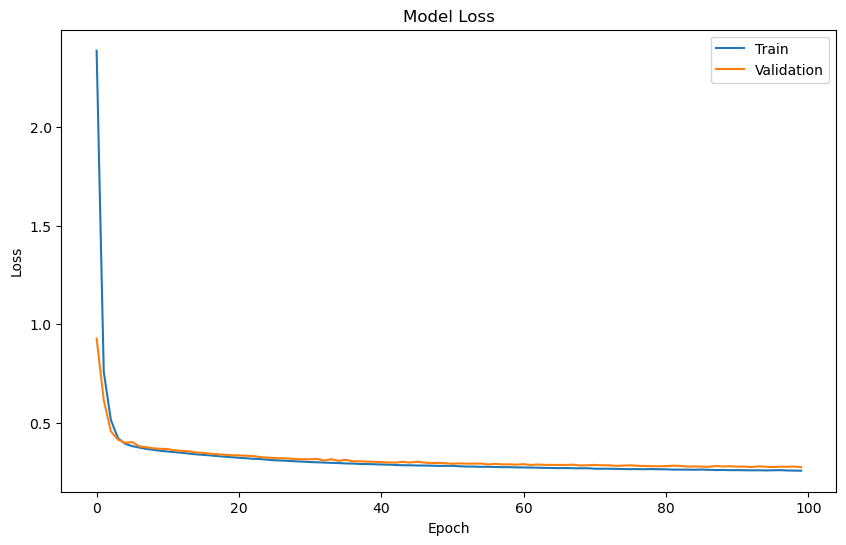

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [24]:
y_pred = lstm_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
Mean Squared Error: 0.2774639957975966
R-squared: 0.7882615271988858


/var/folders/63/gfgyqz0s19d0np85bch0z7k00000gn/T/ipykernel_39176/2189938694.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual Prices', shade=True)
/var/folders/63/gfgyqz0s19d0np85bch0z7k00000gn/T/ipykernel_39176/2189938694.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred.flatten(), label='Predicted Prices', shade=True)


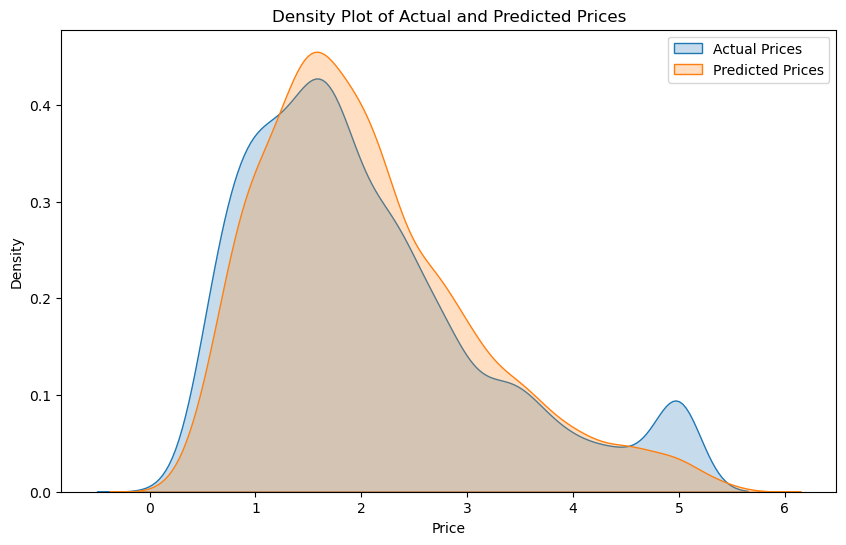

In [25]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Prices', shade=True)
sns.kdeplot(y_pred.flatten(), label='Predicted Prices', shade=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of Actual and Predicted Prices')
plt.legend()
plt.show()

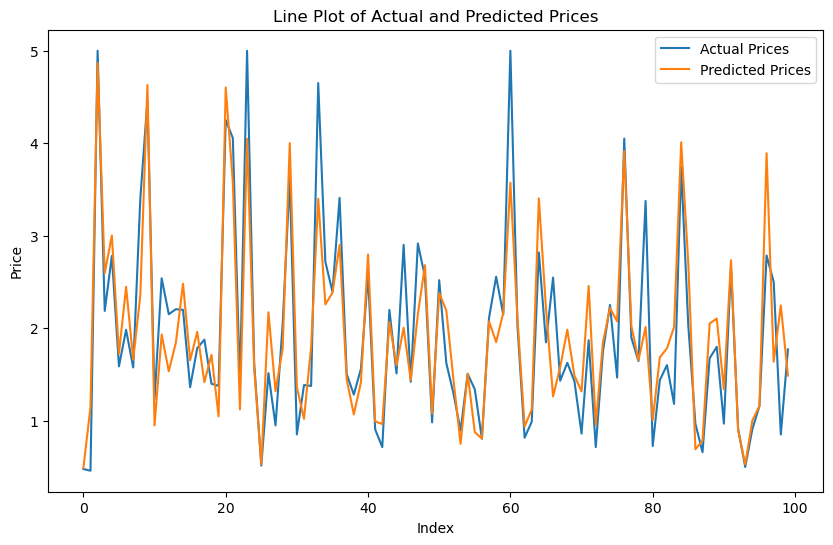

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100].reset_index(drop=True), label='Actual Prices')
plt.plot(y_pred[:100], label='Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Line Plot of Actual and Predicted Prices')
plt.legend()
plt.show()

In [27]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Fetch the California housing dataset
data = fetch_california_housing()

# Convert the data into a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Change display settings to show all rows
pd.set_option('display.max_rows', None)

# Now print the DataFrame and it will display all rows
print(df)


        MedInc  HouseAge    AveRooms  AveBedrms  Population     AveOccup  \
0       8.3252      41.0    6.984127   1.023810       322.0     2.555556   
1       8.3014      21.0    6.238137   0.971880      2401.0     2.109842   
2       7.2574      52.0    8.288136   1.073446       496.0     2.802260   
3       5.6431      52.0    5.817352   1.073059       558.0     2.547945   
4       3.8462      52.0    6.281853   1.081081       565.0     2.181467   
5       4.0368      52.0    4.761658   1.103627       413.0     2.139896   
6       3.6591      52.0    4.931907   0.951362      1094.0     2.128405   
7       3.1200      52.0    4.797527   1.061824      1157.0     1.788253   
8       2.0804      42.0    4.294118   1.117647      1206.0     2.026891   
9       3.6912      52.0    4.970588   0.990196      1551.0     2.172269   
10      3.2031      52.0    5.477612   1.079602       910.0     2.263682   
11      3.2705      52.0    4.772480   1.024523      1504.0     2.049046   
12      3.07